Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


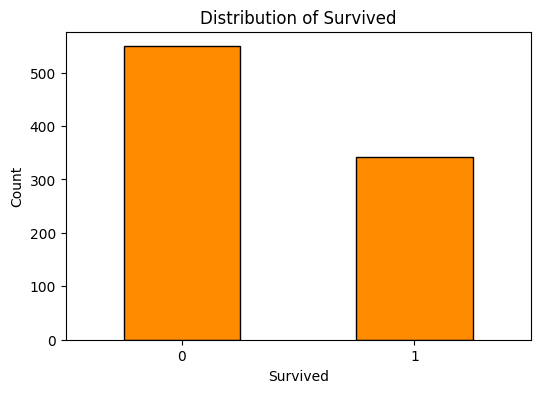

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from pathlib import Path
base_path = Path('/content/drive/MyDrive/ML1')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
titanic_df.tail()

def bar_chart(column_name):
  counts = titanic_df[column_name].value_counts()

  plt.figure(figsize=(6, 4))
  counts.plot(kind='bar', color='darkorange', edgecolor='black')
  plt.title(f'Distribution of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()

bar_chart('Survived')

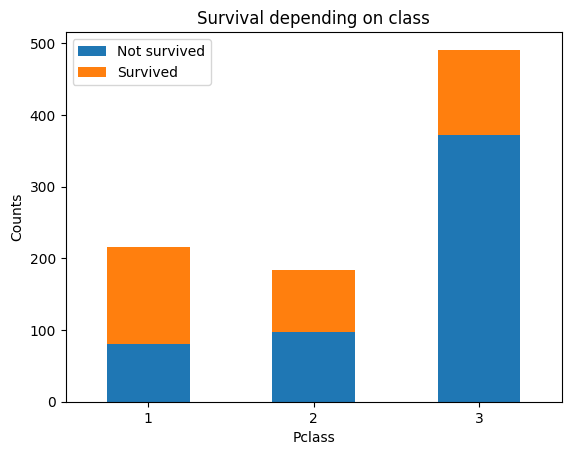

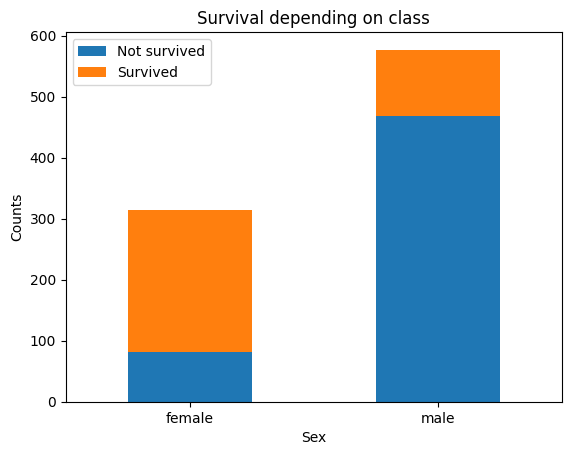

314


In [ ]:
def chart_survival_dependency(column_name):
  counts = titanic_df.groupby([column_name, "Survived"]).size().unstack()

  counts.plot(kind="bar", stacked=True)

  plt.xlabel(column_name)
  plt.ylabel("Counts")
  plt.title("Survival depending on class")
  plt.legend(["Not survived", "Survived"])
  plt.xticks(rotation=0)
  plt.show()

chart_survival_dependency('Pclass')
chart_survival_dependency('Sex')


> Z 1 wykresu wynika, iż najwieksze szanse przetrwania miały osoby w *1 klasie*, natomiast osoby z *3 klasy* najmniejsza

> Procent przetrwania u *kobiet* jest o wiele wiekszy niz u *mezczyzn*


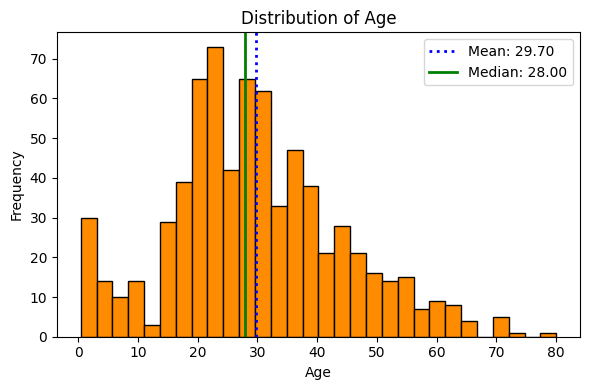

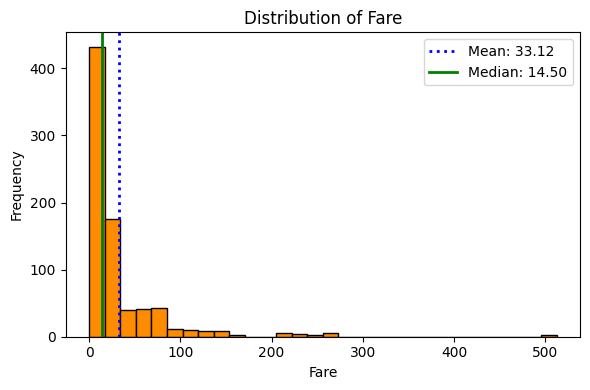

Nie znamy wieku 177 osob


In [ ]:
def plot_histogram(column_name):

    data = titanic_df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='darkorange', edgecolor='black')
    plt.axvline(mean_val, color='blue', linestyle='dotted', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='solid', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_histogram('Age')
plot_histogram('Fare')

age_Nan = titanic_df.Age.isna().sum()
print(f'Nie znamy wieku {age_Nan} osob')

>Z powyższego histogramu widac iż wiek nie rozklada sie normalnie, a nie znamy wieku az **177 osob**, dlatego najlepszym sposobem na uzupełnienie brakujacych informacji bedzie `wylosowanie ich`

losowanie liczb sposrod podanych w kolumnie "Age":

In [ ]:
missing_ages = titanic_df.Age.isna()
Age_prob = titanic_df["Age"].value_counts(normalize=True)
titanic_df.loc[missing_ages,"Age"] = np.random.choice(Age_prob.index,size= missing_ages.sum(),p=Age_prob.values)

> W kolumnie *Fare* brakowalo nam wartosci,a rozklad tej kolumny jest prawo skosny, dlatego zastapilem je srednia z calej kolumny:

In [ ]:
missing_Fare = titanic_df.Fare.isna().sum()
mean_fare = round(titanic_df["Fare"].mean(),2)
titanic_df.loc[titanic_df.Fare.isna(),"Fare"] = mean_fare

Funkcja sprawdzajaca **outliery numeryczne**:

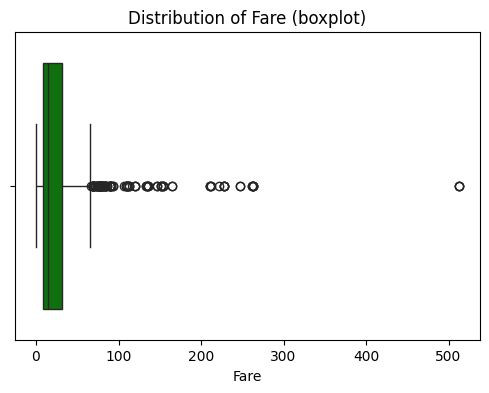

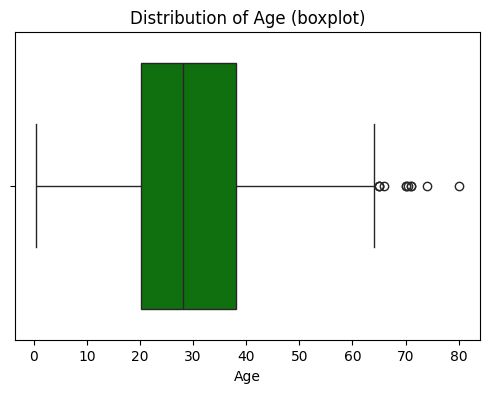

In [ ]:
def testing_outliers(column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=titanic_df[column_name].dropna(), color='green')
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()
testing_outliers("Fare")
testing_outliers("Age")

> Z wykresu *Distribution of age* widzimy ze duzo wynikow znajduje sie poza rozstepem miedzykwartylowym, natomiast nie sa to błedne dane, gdyż człowiek jak najbardziej może osiagac 80 lat.

>Z wykresu *Distribution of Fare* widzimy iż rozstep miedzykwartylowy nie osiaga wartosci 100, a sama mediana znajduja sie <25, co jest adekwatne do rozkładu kolumny Pclass, gdzie najwiecej osob znajduje sie w najtanszej 3 klasie, a najmniej w najdrozszej 1 klasie.   

Funkcja sprawdzajaca **outliery kategorialne**:

In [ ]:
def categoric_outliers(column_name):
    return titanic_df[column_name].unique()
titanic_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic_df.Cabin.isna().sum()

np.int64(687)

W kolumnie **Cabin** wystepuje az 687 pustych komorek, warto zamienic je na osobna kategorie

In [ ]:
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("Unknown")

Kolumna **TICKET** nie jest nam potrzebna do czegokolwiek, a wiec mozna ja usunac

In [ ]:
titanic_df.drop("Family",axis=1,inplace=True)

In [ ]:
whole_family_number = titanic_df.loc[:,"SibSp"] + titanic_df.loc[:,"Parch"]
new_column = pd.Series(data = whole_family_number,name="Family")
titanic_df = pd.concat([titanic_df,new_column],axis=1)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C,1,1
3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S,1,1
5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,Unknown,S,0,0


Stworzylismy nowa kolumne o nazwie *Family*, która przechowuje dane o calkowitej liczbie rodziny znajdujacej sie na pokladzie.

Zakodowalem ceche kategorialna **Sex** porzez uzycie `Binary encoding`:

In [ ]:
titanic_df.Sex.unique()
titanic_df["Sex"] = titanic_df["Sex"].map({"male":0,"female":1})


Ponizej znajduje sie heatmapa pokazujaca korelacje zachodze pomiedzy poszczegolnymi kolumnami

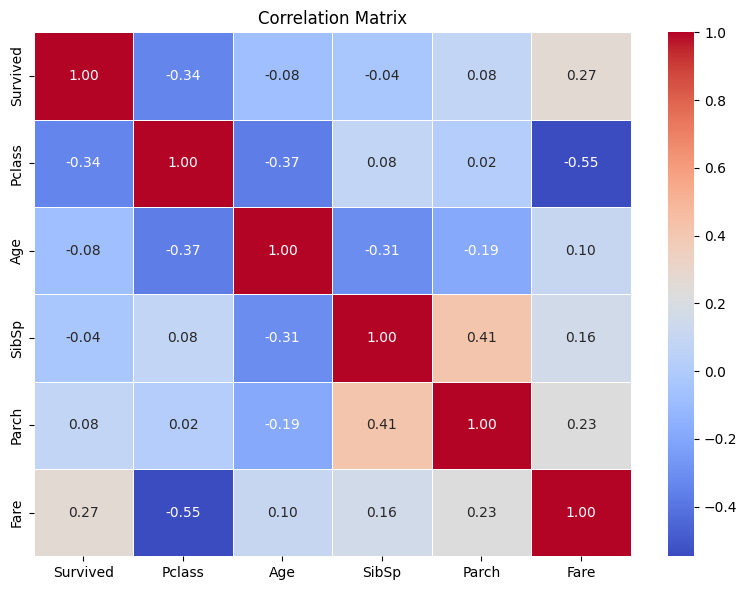

In [ ]:
corr = titanic_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Srednia dlugosc zycia w 1912 roku wynosila 47 lat, sprawdzmy ile osob dozylo tego wieku na pokladzie titanica

In [ ]:
titanic_df["if_avg"] = titanic_df["Age"].apply(lambda x: 1 if x > 47 else 0)
titanic_df["if_avg"].value_counts()

,count
if_avg,
0,777
1,114
